In [1]:
import copy

import torch
from kan import KAN

In [70]:
def create_dataset(train_num=750, test_num=500):
    def generate_contrastive(x):
        # positive samples
        batch = x.shape[0]
        x[:, 2] = torch.sin(6 * x[:, 0]) + torch.exp(2*x[:, 1])
        x[:, 6] = 4 * x[:, 3] + x[:, 4] + x[:, 5]

        # negative samples
        x_cor = copy.deepcopy(x)
        for i in range(x_cor.shape[1]):
            x_cor[:, i] = x_cor[:, i][torch.randperm(x_cor.shape[0])]

        inputs = torch.cat([x, x_cor], dim=0)
        labels = torch.cat([torch.ones(batch, ), torch.zeros(batch, )], dim=0)[:, None]
        return inputs, labels

    x = torch.rand(train_num, 7) * 2 - 1
    x_train, y_train = generate_contrastive(x)

    x = torch.rand(test_num, 7) * 2 - 1
    x_test, y_test = generate_contrastive(x)

    dataset = {'train_input': x_train, 'test_input': x_test, 'train_label': y_train, 'test_label': y_test}
    return dataset


dataset = create_dataset()

# First equation

checkpoint directory created: ./model
saving model version 0.0
saving model version 0.1


| train_loss: 1.34e-01 | test_loss: 1.24e-01 | reg: 1.21e+01 | : 100%|█| 30/30 [00:14<00:00,  2.06it


saving model version 0.2


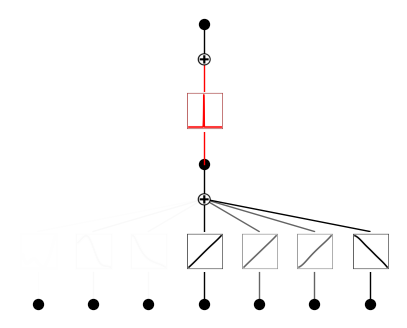

In [4]:
model = KAN(width=[7, 1, 1], grid=3, k=3)
model.fix_symbolic(1, 0, 0, 'gaussian', fit_params_bool=False)
model.fit(dataset, opt="LBFGS", steps=30, lamb=0.001, lamb_entropy=4.0)
model.plot()



# Second equation

checkpoint directory created: ./model
saving model version 0.0
saving model version 0.1
saving model version 0.2
saving model version 0.3
saving model version 0.4
saving model version 0.5


| train_loss: 1.78e-01 | test_loss: 1.86e-01 | reg: 9.92e+00 | : 100%|█| 20/20 [00:10<00:00,  1.93it


saving model version 0.6


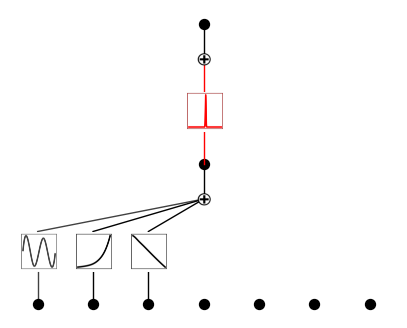

In [71]:
model = KAN(width=[7, 1, 1], grid=3, k=3)
model.fix_symbolic(1, 0, 0, 'gaussian', fit_params_bool=False)
model.fix_symbolic(0, 3, 0, '0', fit_params_bool=False)
model.fix_symbolic(0, 4, 0, '0', fit_params_bool=False)
model.fix_symbolic(0, 5, 0, '0', fit_params_bool=False)
model.fix_symbolic(0, 6, 0, '0', fit_params_bool=False)
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.0001, lamb_entropy=4.0)
model.plot()


saving model version 0.16
skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,2,0) since already symbolic
skipping (0,3,0) since already symbolic
skipping (0,4,0) since already symbolic
skipping (0,5,0) since already symbolic
skipping (0,6,0) since already symbolic
skipping (1,0,0) since already symbolic
saving model version 0.16


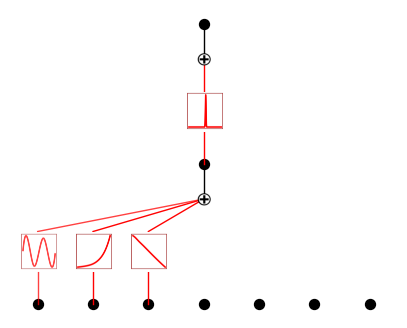

In [81]:
model.prune()
model.auto_symbolic()
model.plot()